## Image classfication

In [15]:
import turicreate

In [16]:
image_train = turicreate.SFrame('https://static.turi.com/datasets/coursera/deep_learning/image_train_data')
image_test = turicreate.SFrame('https://static.turi.com/datasets/coursera/deep_learning/image_test_data')

In [17]:
sketch = turicreate.Sketch(image_train['label'])
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


#### Split data into individual sets

In [18]:
dog_data = image_train.filter_by(values=['dog'], column_name='label')
cat_data = image_train.filter_by(values=['cat'], column_name='label')
bird_data = image_train.filter_by(values=['bird'], column_name='label')
automobile_data = image_train.filter_by(values=['automobile'], column_name='label')

### Create models

In [19]:
dog_model = turicreate.nearest_neighbors.create(dog_data, features=['deep_features'], label='id')
cat_model = turicreate.nearest_neighbors.create(cat_data, features=['deep_features'], label='id')
bird_model = turicreate.nearest_neighbors.create(bird_data, features=['deep_features'], label='id')
automobile_model = turicreate.nearest_neighbors.create(automobile_data, features=['deep_features'], label='id')

Starting brute force nearest neighbors model training.

Starting brute force nearest neighbors model training.

Starting brute force nearest neighbors model training.

Starting brute force nearest neighbors model training.

In [36]:
def get_image_from_id(query):
    return image_train.filter_by(query['reference_label'], 'id')

In [20]:
image_test[0:1]['image'].explore()

In [21]:
mycat = image_test[0:1]

In [22]:
cat_model.query(mycat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 2.521ms      |

| Done         |         | 100         | 13.217ms     |

+--------------+---------+-------------+--------------+

Columns:
	query_label	int
	reference_label	int
	distance	float
	rank	int

Rows: 5

Data:
+-------------+-----------------+--------------------+------+
| query_label | reference_label |      distance      | rank |
+-------------+-----------------+--------------------+------+
|      0      |      16289      | 34.62371920804245  |  1   |
|      0      |      45646      | 36.00687992842462  |  2   |
|      0      |      32139      | 36.52008134363789  |  3   |
|      0      |      25713      | 36.754850252057054 |  4   |
|      0      |       331       | 36.87312281675268  |  5   |
+-------------+-----------------+--------------------+------+
[5 rows x 4 columns]

In [23]:
dog_model.query(mycat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 2.465ms      |

| Done         |         | 100         | 16.667ms     |

+--------------+---------+-------------+--------------+

Columns:
	query_label	int
	reference_label	int
	distance	float
	rank	int

Rows: 5

Data:
+-------------+-----------------+--------------------+------+
| query_label | reference_label |      distance      | rank |
+-------------+-----------------+--------------------+------+
|      0      |      16976      | 37.464262878423774 |  1   |
|      0      |      13387      | 37.56668321685285  |  2   |
|      0      |      35867      | 37.60472670789396  |  3   |
|      0      |      44603      | 37.70655851529755  |  4   |
|      0      |       6094      | 38.511325490739715 |  5   |
+-------------+-----------------+--------------------+------+
[5 rows x 4 columns]

In [24]:
cat_model.query(mycat)['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 2.295ms      |

| Done         |         | 100         | 16.767ms     |

+--------------+---------+-------------+--------------+

36.15573070978294

In [25]:
dog_model.query(mycat)['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 2.47ms       |

| Done         |         | 100         | 16.813ms     |

+--------------+---------+-------------+--------------+

37.77071136184157

### Split test data

In [26]:
dog_test_data = image_test.filter_by(values=['dog'], column_name='label')
cat_test_data = image_test.filter_by(values=['cat'], column_name='label')
bird_test_data = image_test.filter_by(values=['bird'], column_name='label')
automobile_test_data = image_test.filter_by(values=['automobile'], column_name='label')

In [27]:
dog_cat_neighbours = cat_model.query(dog_test_data, k=5)
dog_bird_neighbours = bird_model.query(dog_test_data, k=5)
dog_automobile_neighbours = automobile_model.query(dog_test_data, k=5)
dog_dog_neighbours = dog_model.query(dog_test_data, k=5)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 43000   | 8.44794     | 115.972ms    |

| Done         | 509000  | 100         | 171.857ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 40000   | 8.3682      | 117.189ms    |

| Done         | 478000  | 100         | 167.853ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 43000   | 8.44794     | 104.922ms    |

| Done         | 509000  | 100         | 174.056ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 43000   | 8.44794     | 137.527ms    |

| Done         | 509000  | 100         | 189.414ms    |

+--------------+---------+-------------+--------------+

In [28]:
dog_distances = turicreate.SFrame({
    'dog-dog': dog_dog_neighbours['distance'],
    'dog-cat': dog_cat_neighbours['distance'],
    'dog-bird':dog_bird_neighbours['distance'],
    'dog-automobile':dog_automobile_neighbours['distance']
})

In [29]:
def dog_correct(row):
    if row['dog-dog'] < row['dog-cat'] and row['dog-dog'] < row['dog-bird'] and row['dog-dog'] < row['dog-automobile']:
        return 1
    else:
        return 0

In [35]:
dog_distances.apply(dog_correct).sum()

3554

In [41]:
dog_model.query(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 2.855ms      |

| Done         |         | 100         | 16.853ms     |

+--------------+---------+-------------+--------------+

Columns:
	query_label	int
	reference_label	int
	distance	float
	rank	int

Rows: 5

Data:
+-------------+-----------------+--------------------+------+
| query_label | reference_label |      distance      | rank |
+-------------+-----------------+--------------------+------+
|      0      |      16976      | 37.464262878423774 |  1   |
|      0      |      13387      | 37.56668321685285  |  2   |
|      0      |      35867      | 37.60472670789396  |  3   |
|      0      |      44603      | 37.70655851529755  |  4   |
|      0      |       6094      | 38.511325490739715 |  5   |
+-------------+-----------------+--------------------+------+
[5 rows x 4 columns]

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 2.849ms      |

| Done         |         | 100         | 22.565ms     |

+--------------+---------+-------------+--------------+


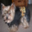
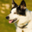
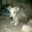

In [40]:
get_image_from_id(dog_model.query(image_test[0:1]))['image'].explore()